## Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import hypyp.fnirs as fnirs
from hypyp.wavelet import ComplexMorletWavelet, ComplexGaussianWavelet
from hypyp.utils import Task

## Download and load raw data from disk

To use as example, we download the dataset "Dataset of parent-child hyperscanning fNIRS recordings" from https://researchdata.ntu.edu.sg/dataset.xhtml?persistentId=doi:10.21979/N9/35DNCW


In [3]:
browser = fnirs.DataBrowser()
dir = browser.download_demo_dataset()


## Lag comparison for different wavelets

We load a single subject file and set a single task, but starting with a lag, to create "dyads". We then compare the coherence for these lags, given a set of wavelet configurations


Time for computing one dyad: 0.13 seconds
Expected time for 4 dyads: 0.53 seconds


Time for computing one dyad: 0.10 seconds
Expected time for 4 dyads: 0.40 seconds


Time for computing one dyad: 0.10 seconds
Expected time for 4 dyads: 0.38 seconds


Time for computing one dyad: 0.09 seconds
Expected time for 4 dyads: 0.37 seconds


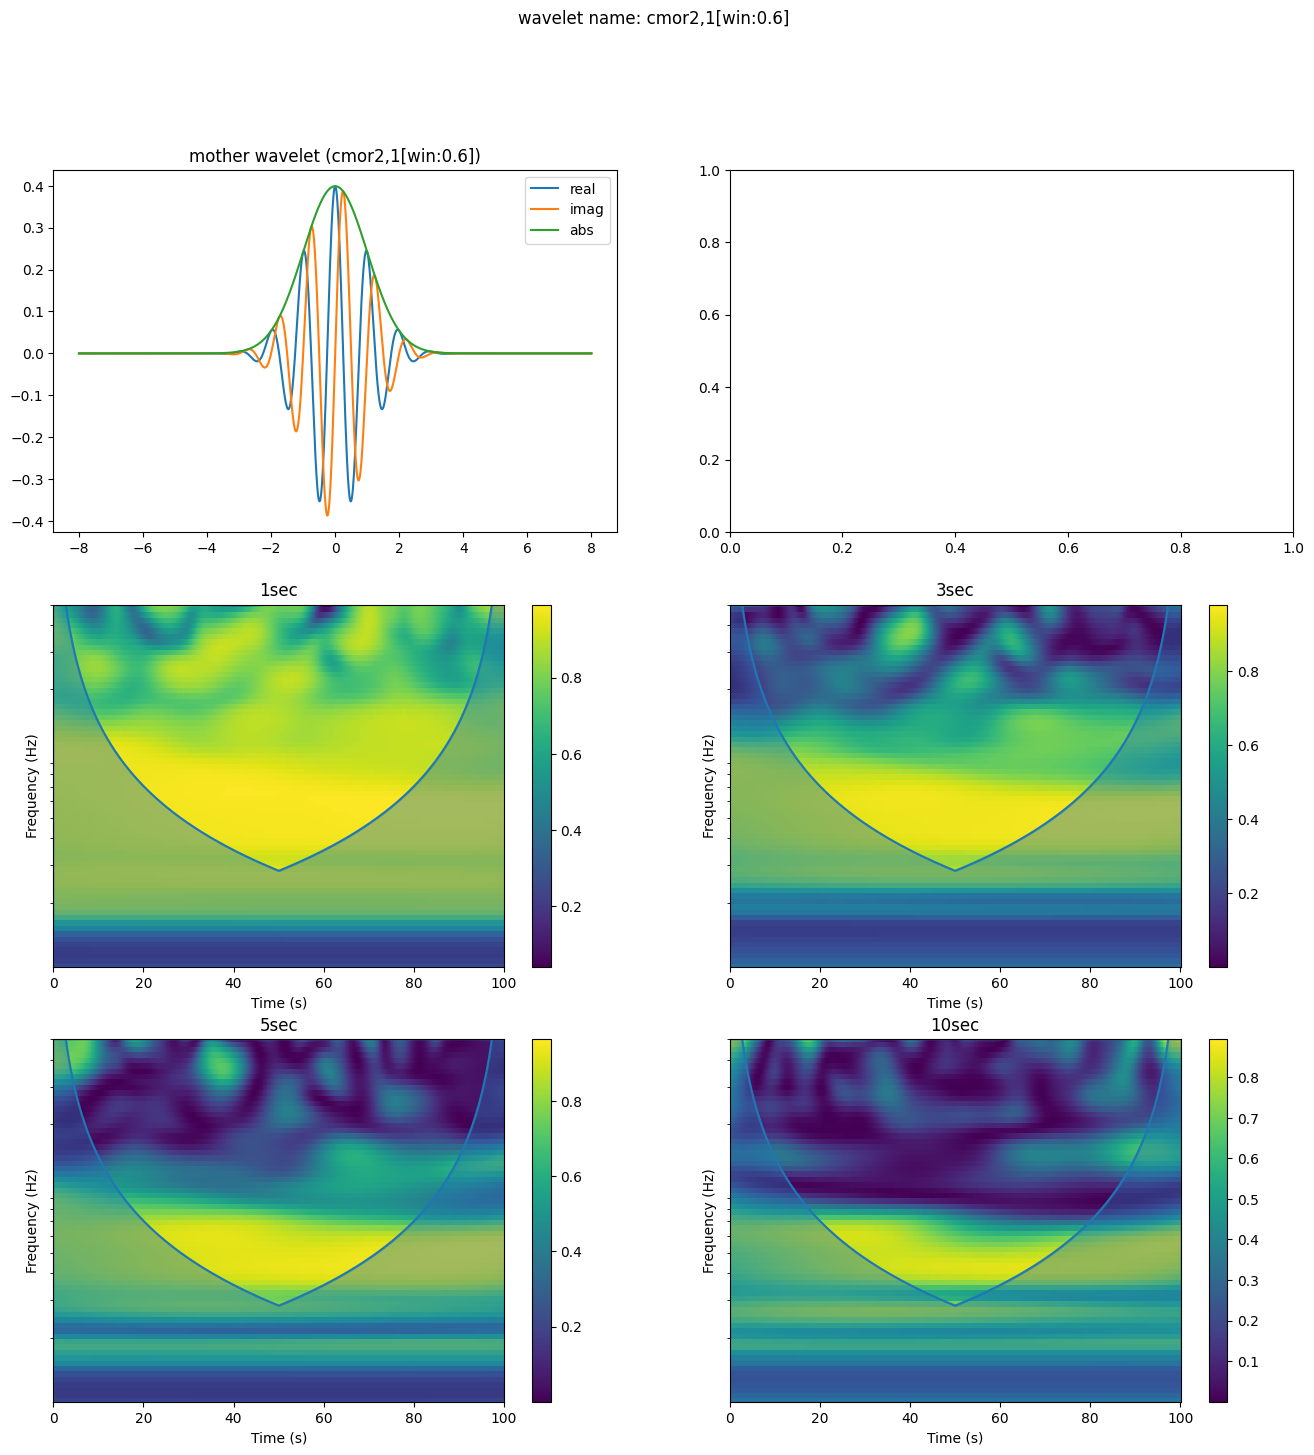

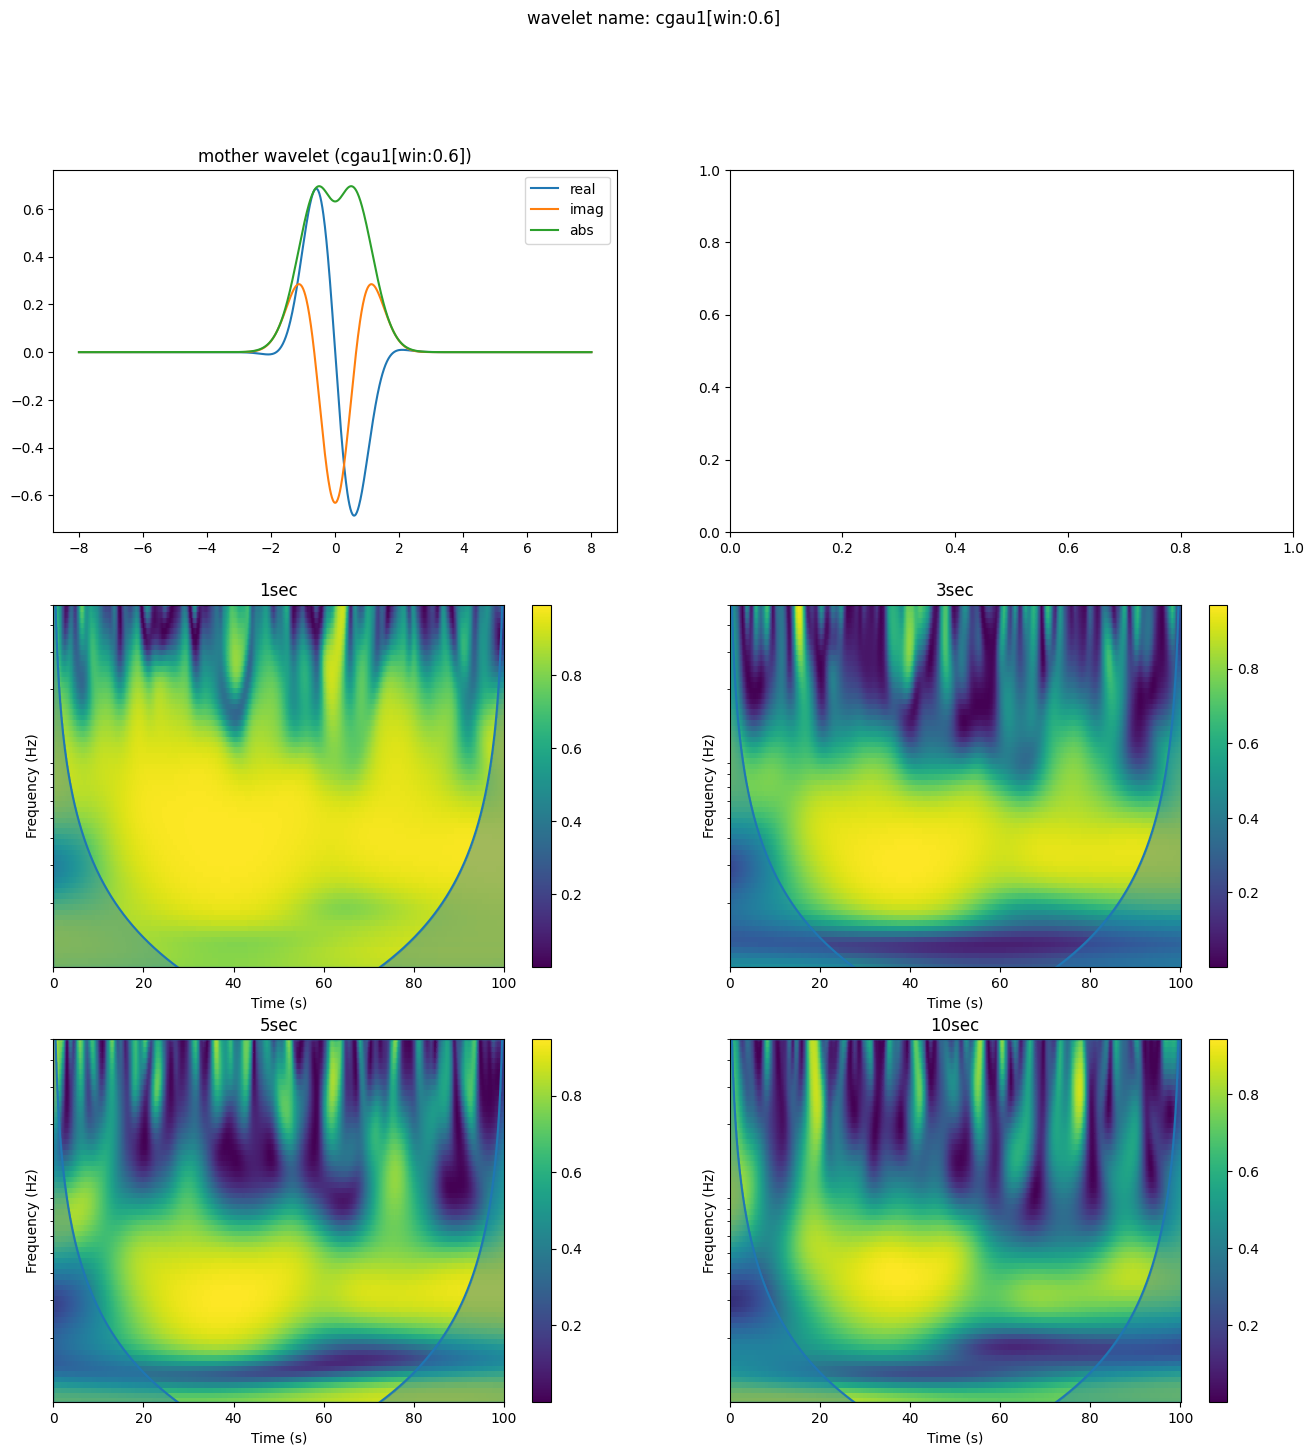

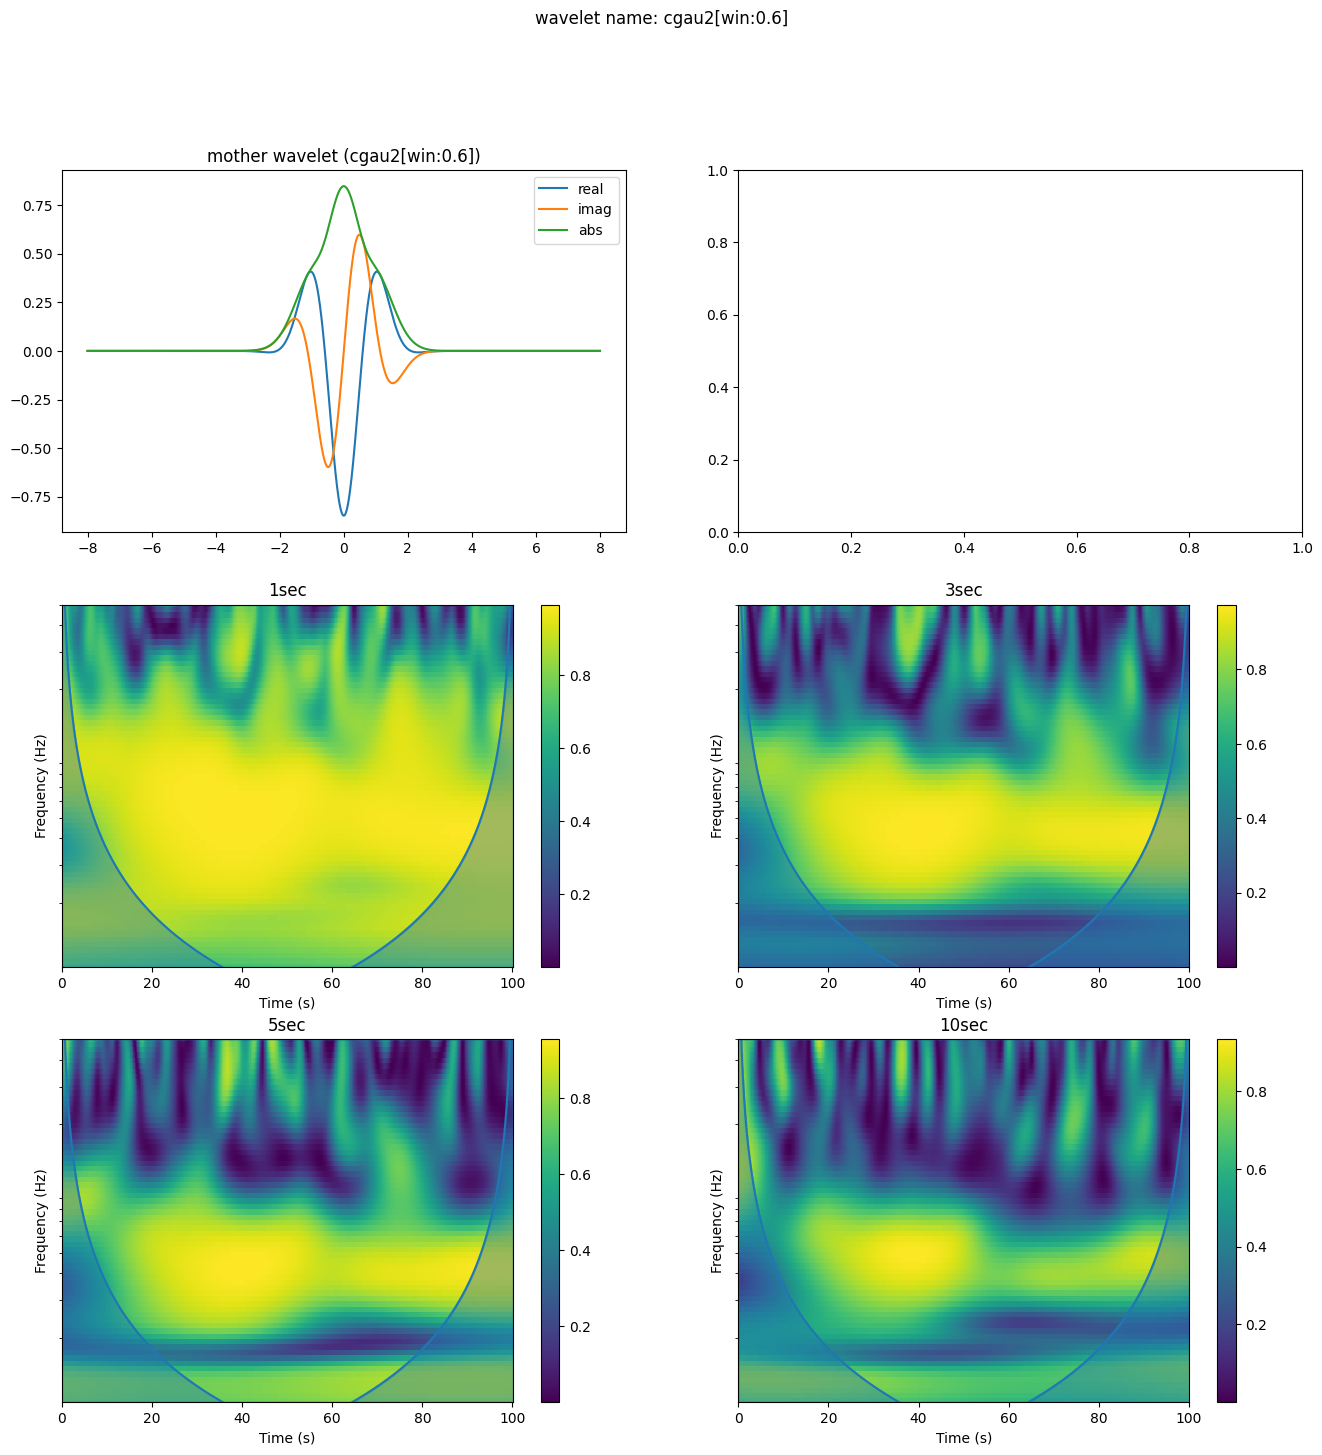

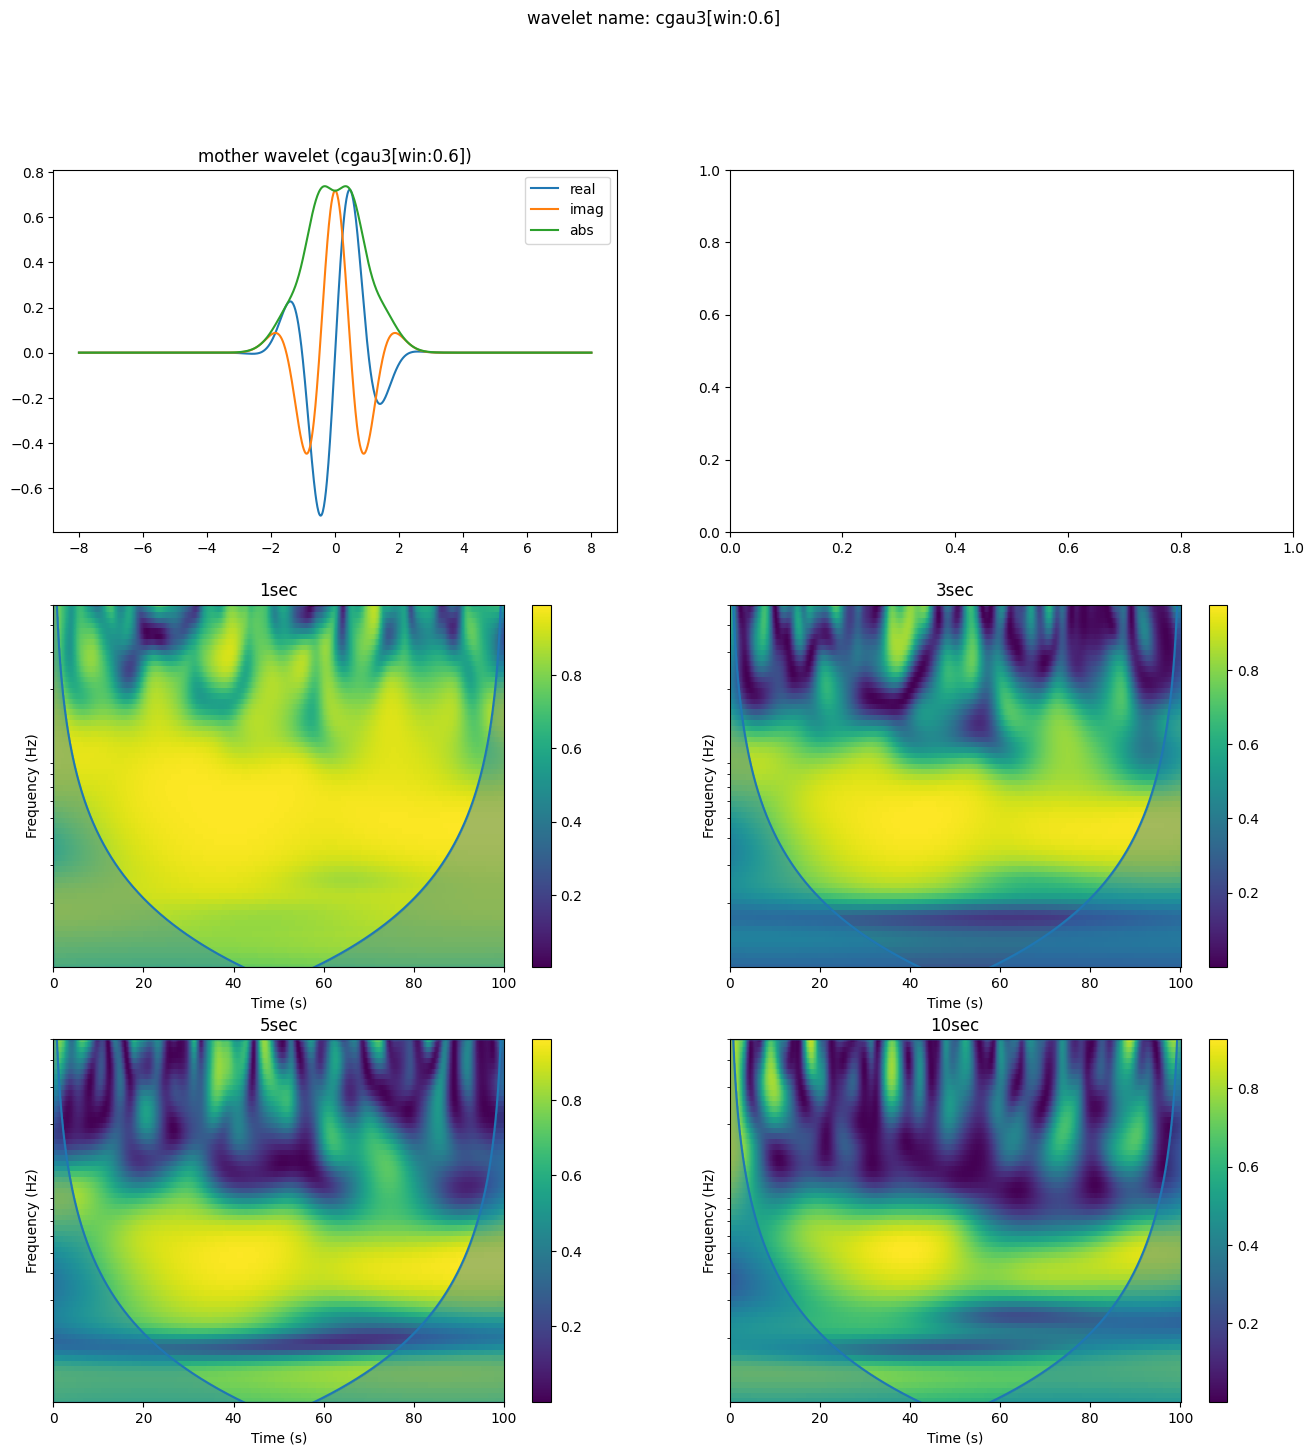

In [4]:

my_file = '../data/NIRS/downloads/fathers/FCS01/parent/NIRS-2019-09-28_002.hdr'

preprocessor = fnirs.MnePreprocessorRawToHaemo()

recordings = []
dyads = []

recordings.append(fnirs.Recording(subject_label='base', tasks=[Task('baseline', onset_time=0, duration=100)]))
recordings.append(fnirs.Recording(subject_label='1sec', tasks=[Task('baseline', onset_time=1, duration=101)]))
recordings.append(fnirs.Recording(subject_label='3sec', tasks=[Task('baseline', onset_time=3, duration=103)]))
recordings.append(fnirs.Recording(subject_label='5sec', tasks=[Task('baseline', onset_time=5, duration=105)]))
recordings.append(fnirs.Recording(subject_label='10sec', tasks=[Task('baseline', onset_time=10, duration=110)]))

for subject in recordings:
    subject.load_file(my_file, preprocessor)

for recording_with_lag in recordings[1:]:
    dyads.append(fnirs.Dyad(recordings[0], recording_with_lag, label=recording_with_lag.subject_label))

study = fnirs.Study(dyads)

wavelets = [
    ComplexMorletWavelet(period_range=(2, 100)),
    ComplexGaussianWavelet(degree=1, period_range=(2, 100)),
    ComplexGaussianWavelet(degree=2, period_range=(2, 100)),
    ComplexGaussianWavelet(degree=3, period_range=(2, 100)),
]

for wavelet in wavelets:
    study.compute_wtcs(ch_match=('S1_D1 hbo', 'S1_D2 hbo'), wavelet=wavelet)

    fig, axes = plt.subplots(3, 2, figsize=(16, 16))
    fig.suptitle(f'wavelet name: {wavelet.wavelet_name_with_args}')
    wavelet.plot_mother_wavelet(ax=axes.flatten()[0])
    for i, dyad in enumerate(study.dyads):
        _ = dyad.wtcs[0].plot(title=dyad.label, ax=axes.flatten()[i+2])
